In [1]:
from run import full_train_test

In [4]:
N_TRAIN_SAMPLES = 30000
N_VALI_SAMPLES = 5000
N_ITER = 1
N_EPOCHS = 2
BATCH_SIZE = 250

Iteration 1
Epoch: 1 / 2 
 Train loss: 0.0450 - Test loss:0.0815 
 Train acc: 0.7954 - Test acc: 0.7852
Epoch: 2 / 2 
 Train loss: 0.0253 - Test loss:0.0655 
 Train acc: 0.8617 - Test acc: 0.8532


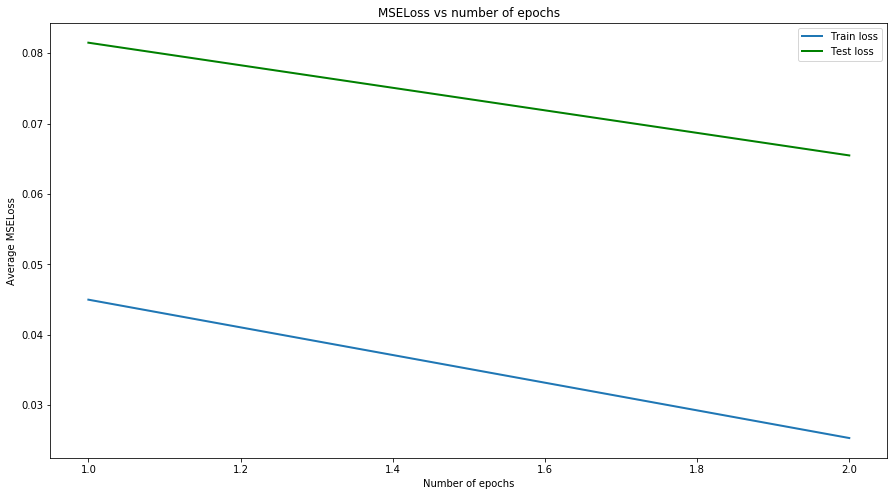

Train accuracy mean = 0.8617333333333334
Test accuracy mean = 0.8572


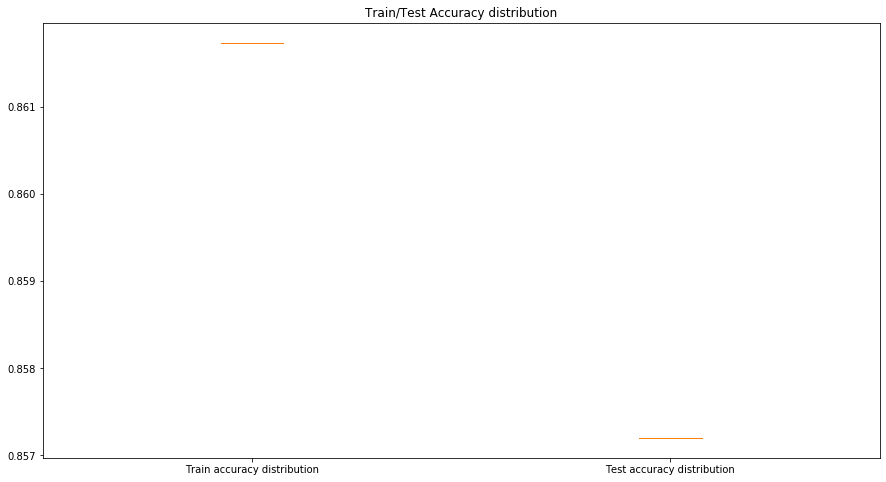

Accuracy: 0.857 +/- 0.000
Iteration time:  7.822 +/- 0.000 seconds


In [5]:
full_train_test("BCD",N_TRAIN_SAMPLES, N_VALI_SAMPLES, N_ITER, N_EPOCHS,d1 = 300, d2 = 300, d3 = 300, verbose = True )

Iteration 1
Epoch: 1 / 2 
 Train loss: 0.9784 - Test loss:0.9812 
 Train acc: 0.5628 - Test acc: 0.5448
Epoch: 2 / 2 
 Train loss: 0.6202 - Test loss:0.6283 
 Train acc: 0.7576 - Test acc: 0.7586


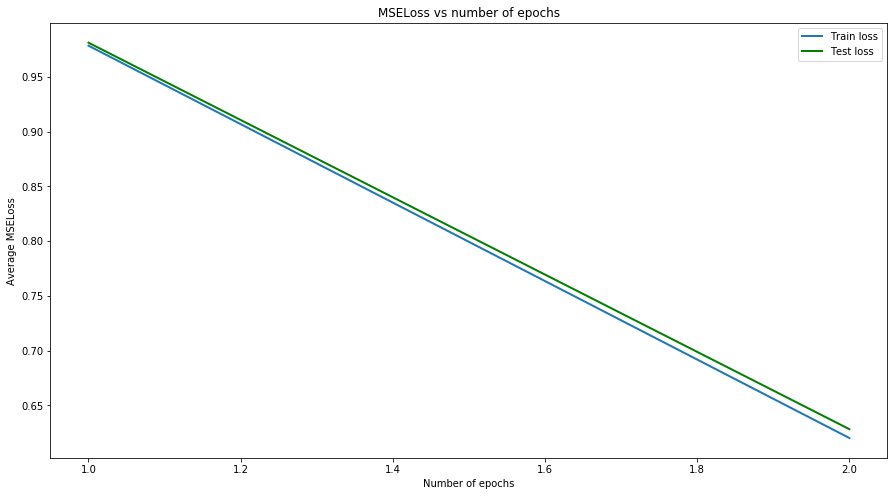

Train accuracy mean = 0.7575666666666666
Test accuracy mean = 0.8278


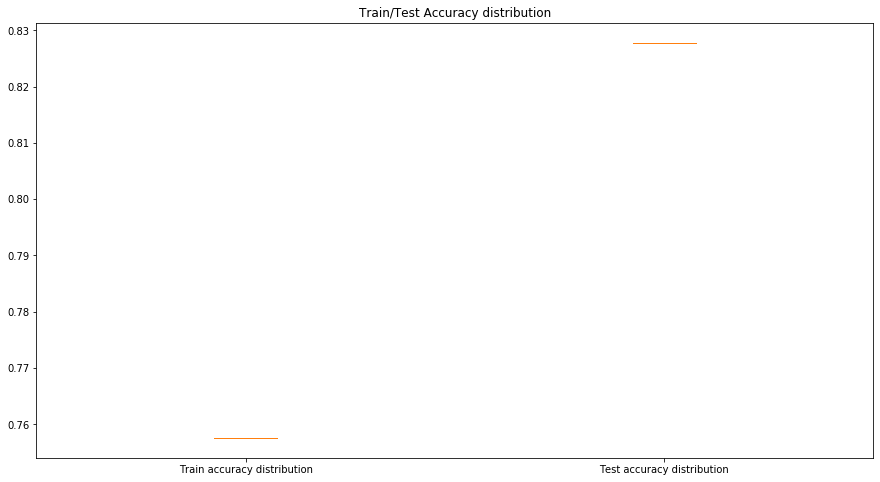

Accuracy: 0.828 +/- 0.000
Iteration time:  17.061 +/- 0.000 seconds


In [5]:
full_train_test("DFW",N_TRAIN_SAMPLES, N_VALI_SAMPLES, N_ITER, N_EPOCHS, BATCH_SIZE, verbose = True)